### Analyze Auto sales trend and verify if RCF detects abrupt shift in sales
#### Years: 2005 to 2020.  This period covers recession due to housing crisis in 2008, followed by recovery and economic impact due to Covid
### Data Source:
Monthly New Vehicle Sales for the United States Automotive Market: https://www.goodcarbadcar.net/usa-auto-industry-total-sales-figures/<br>
Raw data: http://www.bea.gov/<br>

This script is based on AWS SageMaker Examples for Random Cut Forest: https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/random_cut_forest/random_cut_forest.ipynb

In [1]:
import sys
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.dpi']=100

Matplotlib is building the font cache; this may take a moment.


In [6]:
import boto3
import botocore
import sagemaker


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [7]:
### Import s3 bucket name as environment variable

import os
env_vars = !cat ./.env
for var in env_vars:
    key, value = var.split('=')
    os.environ[key] = value

In [8]:
#os.environ['BUCKET_NAME']

In [9]:
bucket = os.environ['BUCKET_NAME']
prefix = 'sagemaker/autosales'
execution_role = sagemaker.get_execution_role()

In [12]:
# check wheter bucket exists

try:
    boto3.Session().client('s3').head_bucket(Bucket=bucket)
except botocore.exceptions.ParamValidationError as e:
    print('Hey! You either forgot to specify your s3 bucket'
         ' or you gave your bucket an invalid name!')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] =='403':
        print("Hey! You don't have permission to access the bucket, {}")
    elif e.response['Error']['Code'] =='404':
        print("Hey! your bucket {} doesn't exist!",format("MyBucket"))
    else:
        raise
        
else:
    print('Training input/output will be stored in: s3://{}/{}'.format("MyBucket",prefix))

Training input/output will be stored in: s3://MyBucket/sagemaker/autosales


In [13]:
%%time
data_filename = 'auto_sales_year_month.csv'
df = pd.read_csv(data_filename)

CPU times: user 5.39 ms, sys: 0 ns, total: 5.39 ms
Wall time: 34.6 ms


In [14]:
df.shape

(188, 2)

In [15]:
df

,timestamp,value
0,2005-01-01,1052224.0
1,2005-02-01,1244753.0
2,2005-03-01,1564938.0
3,2005-04-01,1493837.0
4,2005-05-01,1488171.0
...,...,...
183,2020-04-01,563122.0
184,2020-05-01,1181756.0
185,2020-06-01,1214706.0
186,2020-07-01,481587.0


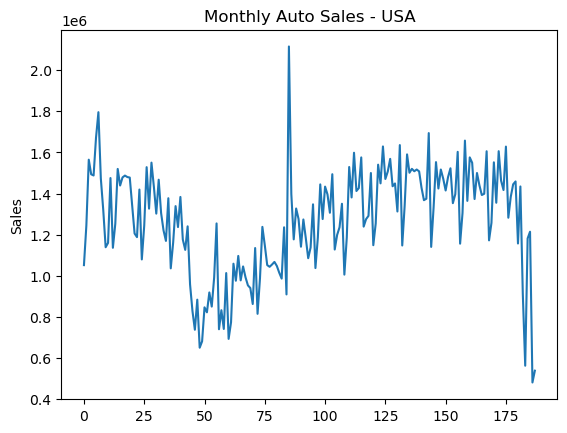

In [16]:
plt.plot(df['value'])
plt.ylabel('Sales')
plt.title('Monthly Auto Sales - USA')
plt.show()

### Big increase in auto sales Feb 2012

In [17]:
df[75:90]

,timestamp,value
75,2011-04-01,1149240.0
76,2011-05-01,1052417.0
77,2011-06-01,1044037.0
78,2011-07-01,1055231.0
79,2011-08-01,1067895.0
80,2011-09-01,1048158.0
81,2011-10-01,1015016.0
82,2011-11-01,986664.0
83,2011-12-01,1236129.0
84,2012-01-01,909806.0


### Autosales hit record low in April 2020

In [20]:
df[175:]

,timestamp,value
175,2019-08-01,1628577.0
176,2019-09-01,1282712.0
177,2019-10-01,1384010.0
178,2019-11-01,1445173.0
179,2019-12-01,1459164.0
180,2020-01-01,1157415.0
181,2020-02-01,1434716.0
182,2020-03-01,912800.0
183,2020-04-01,563122.0
184,2020-05-01,1181756.0
